In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns

from pathlib import Path
from utils.paths import DATA_DIR, VOL_EXPERIMENTS_DIR

In [10]:
df_path = Path('../financial_tests/sp500_vol_forecasts_2000_2024_v2_extended_notransform.parquet')


df = pd.read_parquet(df_path).sort_values(['permno','date'])

df

,permno,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,pred_transformer_100_muon,pred_transformer_100_sgd,lag,date,ret,close,open,high,low,var_check
28089,10078,2.526483,1.963724,1.467432,1.512150,2.044465,2.777617,2.568463,3.457545,2.111343,...,0.604054,0.533246,65,2000-08-28,0.024549,127.8125,125.1875,128.5625,123.75,0.000561
28536,10078,1.961486,1.466110,1.510708,2.042783,2.775471,2.567286,3.455389,2.110057,1.957647,...,0.809103,0.774431,66,2000-08-29,-0.005379,127.125,127.8125,128.125,125.25,0.000246
28984,10078,1.464309,1.509362,2.041102,2.773444,2.565236,3.454004,2.108586,1.956410,1.508148,...,0.701586,0.687228,67,2000-08-30,0.0,127.125,126.5,127.75,125.3125,0.000176
29431,10078,1.507523,2.039456,2.771435,2.563309,3.451547,2.107517,1.955017,1.507051,1.759150,...,0.604396,0.575059,68,2000-08-31,-0.001475,126.9375,127.125,128.125,126.0625,0.000131
29878,10078,2.037151,2.769377,2.561394,3.449202,2.105679,1.953983,1.505887,1.757974,1.624384,...,0.507082,0.453734,69,2000-09-01,0.013294,128.625,128.25,129.3125,126.5625,0.000228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853230,93436,0.908745,1.359408,0.859101,2.222960,1.297665,2.861383,1.802444,1.579436,1.432361,...,1.361997,1.453587,6180,2024-12-18,-0.082795,440.13,466.495,488.53989,427.01001,0.007753
2853723,93436,1.357701,0.858122,2.221198,1.296334,2.859198,1.801446,1.578235,1.431288,0.602104,...,2.046722,2.085916,6181,2024-12-19,-0.008997,436.17001,451.88,456.35999,420.01999,0.002959
2854216,93436,0.856856,2.219451,1.294989,2.857132,1.799749,1.577290,1.430162,0.601291,0.328955,...,2.023381,2.127311,6182,2024-12-20,-0.034643,421.06,425.505,447.07999,417.64001,0.002277
2854708,93436,2.216987,1.293765,2.855085,1.798181,1.575696,1.429251,0.600588,0.328228,1.319478,...,2.016802,2.078630,6183,2024-12-23,0.022657,430.60001,431.0,434.51001,415.41119,0.001010


In [11]:
# Step 1: get sorted unique dates
unique_dates = np.sort(df['date'].unique())

# Step 2: build mapping date -> ordinal index
date_to_t = {d: i for i, d in enumerate(unique_dates)}

# Step 3: map back
df['t'] = df['date'].map(date_to_t)
df.sort_values('t')


,permno,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,pred_transformer_100_sgd,lag,date,ret,close,open,high,low,var_check,t
354,70500,2.306075,0.687910,0.653177,0.198291,1.890088,0.762997,0.968064,-0.164486,0.395424,...,1.723195,0,2000-05-25,0.003788,16.5625,16.4375,16.875,16.3125,0.000552,0
332,64629,2.018848,0.273090,0.227080,0.667600,2.117061,1.500871,1.845419,1.281938,1.939089,...,1.345502,0,2000-05-25,0.0,9.1875,9.25,9.375,9.0625,0.000557,0
257,49373,1.230970,2.912925,1.888096,1.357475,0.836436,0.153033,1.645870,1.077276,0.455883,...,0.891707,0,2000-05-25,-0.031315,29.0,29.875,30.4375,28.75,0.001285,0
27,11955,2.221969,1.729692,0.476362,1.342377,0.861045,0.666624,0.836111,0.063565,1.171640,...,1.127296,0,2000-05-25,0.029801,19.4375,18.6875,19.75,18.3125,0.002257,0
288,56274,1.434835,-0.042918,0.022804,0.748806,0.974337,1.560497,1.209776,1.131886,0.488222,...,0.538618,0,2000-05-25,0.0,22.8125,22.9375,22.9375,22.375,0.000297,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2854715,11308,0.654976,0.447582,-0.299154,0.043968,-0.832272,-1.495508,-1.118039,-1.630334,-1.052564,...,-0.369737,6184,2024-12-24,0.007374,62.84,62.2,62.84,62.01,0.000048,5984
2854966,61735,-0.188351,0.542943,0.373399,0.029217,-1.190281,-0.707182,-1.049075,-0.825486,-0.800600,...,-0.578818,6184,2024-12-24,0.009294,361.60999,359.29001,361.63,356.69,0.000079,5984
2855191,92611,-0.168453,0.703422,-0.122626,0.073293,-1.501795,-1.179503,-1.296237,-1.213599,-0.979619,...,-0.478436,6184,2024-12-24,0.010813,320.64999,318.17001,321.54001,317.28,0.000066,5984
2854832,22111,0.159983,0.767664,-0.913052,-0.343903,-0.480240,-1.159410,-0.078484,0.347293,-0.606614,...,-0.626120,6184,2024-12-24,0.003993,145.85001,145.0,145.85001,144.3325,0.000041,5984


In [12]:
df.to_parquet(f'{DATA_DIR}/preds_v2.parquet')

<Axes: ylabel='Frequency'>

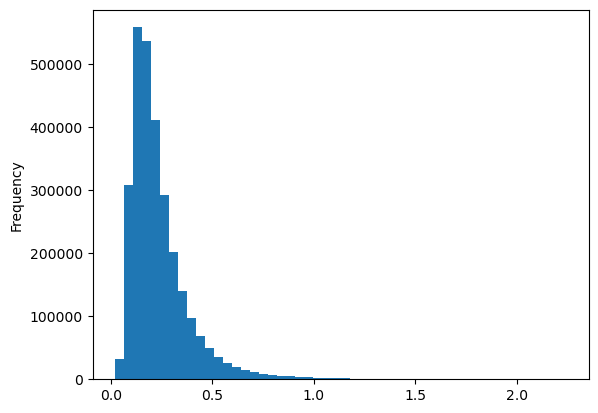

In [15]:
np.sqrt(df['y']).plot(kind='hist', bins=50)

In [3]:
feat_col = [c for c in df.columns if 'feature_' in c]
X = df[feat_col]

var_window = X.var(axis=1)

df['var_window'] = var_window

In [4]:
preds =  [c for c in df.columns if 'pred' in c] + ['ols', 'lasso_0.05']

y = df['y']

for p in preds:
    res_sq = (y - df[p])**2
    res = (y - df[p])
    df[f'{p}_res_sq'] = res_sq
    df[f'{p}_res'] = res

    print(p, np.mean(res_sq))


pred_cnn_100_muon 0.426010534245439
pred_cnn_100_adam 0.43282693329000593
pred_cnn_100_sgd 0.45927583410634937
pred_lstm_100_muon 0.4304414263881988
pred_lstm_100_adam 0.4355784741453046
pred_lstm_100_sgd 0.44552586705955266
pred_mlp_100_muon 0.43918398405070985
pred_mlp_100_adam 0.4353660648132281
pred_mlp_100_sgd 0.43011912003954045
pred_transformer_100_adam 0.43257256437483577
pred_transformer_100_muon 0.4336725225113767
pred_transformer_100_sgd 0.43504473315833214
ols 0.43643710567625643
lasso_0.05 0.44071700994456775


In [5]:
df

,permno,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,pred_transformer_100_adam_res_sq,pred_transformer_100_adam_res,pred_transformer_100_muon_res_sq,pred_transformer_100_muon_res,pred_transformer_100_sgd_res_sq,pred_transformer_100_sgd_res,ols_res_sq,ols_res,lasso_0.05_res_sq,lasso_0.05_res
0,10104,3.022142,3.038342,2.993999,2.888102,2.288038,2.398543,1.626532,2.023018,1.835744,...,0.057078,0.238909,0.136481,0.369434,0.124572,0.352947,0.226000,0.475395,0.470587,0.685994
1,10107,1.966788,1.425903,2.007835,1.607037,1.303735,-0.014046,1.632837,1.133337,2.110379,...,0.126456,0.355607,0.171456,0.414073,0.103020,0.320967,0.086653,0.294369,0.170540,0.412965
2,10138,1.925007,0.744136,1.770868,1.306571,0.597367,0.480277,0.759226,0.764844,2.291407,...,1.606064,-1.267306,1.500362,-1.224892,1.421347,-1.192203,1.542175,-1.241843,1.204755,-1.097613
3,10145,0.910065,1.414771,0.527388,0.742682,1.236556,0.621537,-0.012326,-0.826894,-1.400075,...,0.024750,0.157322,0.059492,0.243911,0.041124,0.202791,0.047942,0.218957,0.100869,0.317598
4,10147,2.013652,1.852590,2.427796,2.700163,1.775644,1.590639,1.293224,2.191215,2.021293,...,0.172096,-0.414845,0.079838,-0.282555,0.094958,-0.308153,0.003491,-0.059086,0.009520,0.097572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855196,93096,1.655723,0.875642,0.736836,0.900131,0.497897,-0.026745,1.047596,0.950905,0.261180,...,1.905040,-1.380232,1.836362,-1.355124,1.944726,-1.394534,1.962564,-1.400915,1.834972,-1.354611
2855197,93132,0.294328,0.919732,0.818286,2.629239,1.113334,0.706085,0.821033,0.402089,0.678040,...,1.447362,-1.203063,1.306086,-1.142841,1.280028,-1.131383,1.394952,-1.181081,1.263745,-1.124164
2855198,93246,1.709164,2.856059,0.733962,1.034886,1.223298,0.163562,0.233318,0.643048,0.523116,...,0.404570,-0.636058,0.368488,-0.607032,0.411649,-0.641599,0.463100,-0.680515,0.379351,-0.615915
2855199,93429,0.857807,1.782350,-0.016198,1.324178,0.158603,-0.964462,-0.263984,0.357285,0.238989,...,0.008729,-0.093432,0.005224,-0.072274,0.001805,-0.042489,0.019607,-0.140024,0.011093,-0.105325


----

## Simulate Noise injection

In [5]:
import json
from pipeline.walkforward import WFCVGenerator
from config.config_types import AppConfig


exp_path = f'{VOL_EXPERIMENTS_DIR}/exp_222_mlp_adam_snr'



cfgs = []

for file in os.listdir(exp_path):
    file_path = f'{exp_path}/{file}/config_snapshot.json'
    with open(file_path) as f:
        config = json.load(f)
    config = config['cfg']
    try:
        cfg = AppConfig.from_dict(config)

        noise = config['walkforward']['noise']
        if isinstance(noise, str):
            print(file, noise)
            cfgs.append(cfg)
    except TypeError:
        continue


trial_20260217_230738 0.1
trial_20260217_231023 0.25
trial_20260217_231255 0.5
trial_20260217_231527 0.75
trial_20260217_231800 1.25
trial_20260217_232020 1.5
trial_20260217_232227 1.75
trial_20260217_232432 2


In [6]:
wf = WFCVGenerator(cfgs[-1].walkforward, df_long='preds_v2.parquet')

19:13:08 - WFCVGenerator - DEBUG - WFConfig(train=3591d, val=1197d, test=1197d, lags=100, step=1197, max_folds=None) (walkforward.py:30)
19:13:08 - WFCVGenerator - DEBUG - self.scale_type: None (walkforward.py:42)
19:13:08 - WFCVGenerator - DEBUG - self.scale: False (walkforward.py:43)
19:13:08 - WFCVGenerator - DEBUG - pred_mlp_100_adam (walkforward.py:48)
19:13:09 - WFCVGenerator - DEBUG - Preprocessed df:
                  t  pred_mlp_100_adam        permno
count  2.854980e+06       2.854980e+06  2.854980e+06
mean   3.036053e+03       1.882371e-02  5.354168e+04
std    1.724749e+03       6.963442e-01  2.808919e+04
min    0.000000e+00      -1.833929e+00  1.007800e+04
25%    1.526000e+03      -4.836579e-01  2.401000e+04
50%    3.068000e+03      -5.133257e-02  5.790400e+04
75%    4.527000e+03       4.467042e-01  8.010000e+04
max    5.984000e+03       3.107278e+00  9.343600e+04 (walkforward.py:81)


In [ ]:
data = {}



for i, fold_data in enumerate(wf.folds()):
    size = fold_data[4]
    y_test = fold_data[5]

    data[i] = fold_data
    print(i)
    #if i == fold_num:
    #    break

use = data[0]


Xtr             = use[0]
ytr             = use[1]
Xv              = use[2]
yv              = use[3]
Xte             = use[4]
yte             = use[5]
Xtr_val         = use[6]
ytr_val         = use[7]
Xte_merged      = use[8]
yte_merged      = use[9]
id_tr           = use[10]
id_v            = use[11]
id_te           = use[12]
window_train    = use[13]
window_val      = use[14]
window_test     = use[15]
X_scaler        = use[16]
y_scaler        = use[17]
X_scaler_merged = use[18]
y_scaler_merged = use[19]


19:13:29 - WFCVGenerator - DEBUG - output_cols: ['y'] (walkforward.py:387)
19:13:29 - WFCVGenerator - DEBUG - self.folds_count: 1 (walkforward.py:388)
19:13:34 - WFCVGenerator - DEBUG - Fold 0: train=1551574, val=522106, test=520974 (walkforward.py:457)
19:13:34 - WFCVGenerator - DEBUG - Not scaling (walkforward.py:497)
19:13:34 - WFCVGenerator - DEBUG - Generating fold: 0 (walkforward.py:505)
19:13:34 - WFCVGenerator - DEBUG - Merged arrays shapes: Xtr_val=(2073680, 100), ytr_val=(2073680, 1) (walkforward.py:506)
19:13:34 - WFCVGenerator - DEBUG - Merged test shapes: Xte_merged=(520974, 100), yte_merged=(520974, 1) (walkforward.py:507)


0


: 